<a href="https://colab.research.google.com/github/MidasXIV/Artificial-Intelliegence--Deep-Learning--Tensor-Flow/blob/master/9.%20Object%20Detection/CompleteColabEnvironmentSetup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Object Detection
When we’re shown an image, our brain instantly recognizes the objects contained in it. On the other hand, it takes a lot of time and training data for a machine to identify these objects. But with the recent advances in hardware and deep learning, this computer vision field has become a whole lot easier and more intuitive.

### STEP 1 : Environment Setup

#### STEP 1.1 - Install Dependencies

In [37]:
!pip install pillow
!pip install lxml
!pip install jupyter
!pip install matplotlib

#### STEP 1.2 Get Models Folder
Next, we need to clone the github. We can do this with git.

In [38]:
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [39]:
!ls                   # To view the folders on your workspace
!cd models && ls      # Go to downloaded models folder and List files
!pwd                  # Shows we can't remain in models directory

anchor_generators		     matchers
box_coders			     meta_architectures
builders			     metrics
CONTRIBUTING.md			     model_hparams.py
core				     model_lib.py
data				     model_lib_test.py
data_decoders			     model_main.py
dataset_tools			     models
dockerfiles			     model_tpu_main.py
eval_util.py			     object_detection_tutorial.ipynb
eval_util_test.py		     predictors
exporter.py			     protos
exporter_test.py		     __pycache__
export_inference_graph.py	     README.md
export_tflite_ssd_graph_lib.py	     samples
export_tflite_ssd_graph_lib_test.py  ssd_mobilenet_v1_coco_2017_11_17
export_tflite_ssd_graph.py	     ssd_mobilenet_v1_coco_2017_11_17.tar.gz
g3doc				     test_ckpt
inference			     test_data
__init__.py			     test_images
inputs.py			     tpu_exporters
inputs_test.py			     utils
legacy
embedded_ssd_mobilenet_v1_feature_extractor.py
embedded_ssd_mobilenet_v1_feature_extractor_test.py
faster_rcnn_inception_resnet_v2_feature_extractor.py
faster_rcnn_inception_resnet_v2_fe

#### STEP 1.3 - COCO API installation
COCO API - http://cocodataset.org/ COCO is a large image dataset designed for object detection, segmentation, person keypoints detection, stuff segmentation, and caption generation. This package provides Matlab, Python, and Lua APIs that assists in loading, parsing, and visualizing the annotations in COCO.


In [40]:
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI && make

Cloning into 'cocoapi'...
remote: Enumerating objects: 953, done.
remote: Total 953 (delta 0), reused 0 (delta 0), pack-reused 953
Receiving objects: 100% (953/953), 11.70 MiB | 31.78 MiB/s, done.
Resolving deltas: 100% (565/565), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/object_detection/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/

copy pycoltools from /coocoapi/PythonAPI folder to /models/research/ folder

In [0]:
!cp -r cocoapi/PythonAPI/pycocotools models/research/

In [42]:
!cd models/research/ && ls

cocoeval.py  __init__.py  _mask.cpython-36m-x86_64-linux-gnu.so  _mask.pyx
coco.py      _mask.c	  mask.py


#### STEP 1.4 - Protobuf Compilation
The Tensorflow Object Detection API uses Protobufs to configure model and training parameters. Before the framework can be used, the Protobuf libraries must be compiled.

In [43]:
!apt-get -y install protobuf-compiler python-pil python-lxml

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pil is already the newest version (5.1.0-1).
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-lxml is already the newest version (4.2.1-1ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [44]:
!protoc --version

libprotoc 3.0.0


This should be done by running the following command from the tensorflow/models/research/ directory:

In [45]:
!cd models/research && protoc object_detection/protos/*.proto --python_out=. && export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim && pwd

object_detection/protos/*.proto: No such file or directory


In [46]:
%cd models/research/object_detection # move to the object detection folder to run the following code.

[Errno 2] No such file or directory: 'models/research/object_detection # move to the object detection folder to run the following code.'
/content/models/research/object_detection


### Step 2 : Object Detection Program 

#### Step 2.1 - Imports

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')

#### Step 2.2 - Env setup

In [0]:
# This is needed to display the images.
%matplotlib inline

In [0]:
# https://www.dlology.com/blog/how-to-train-an-object-detection-model-easy-for-free/

#### Step 2.3 - Object detection imports

Here are the imports from the object detection module.


In [0]:
from utils import label_map_util

from utils import visualization_utils as vis_util

In [0]:
# What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

In [0]:
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())


In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

test_images/image1.jpg
test_images/image2.jpg


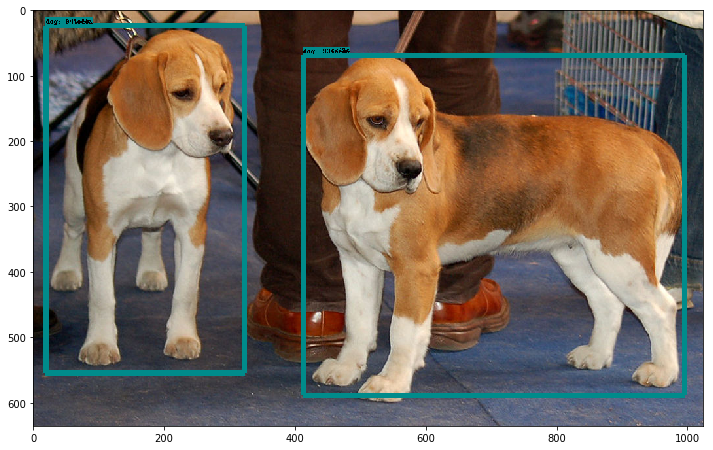

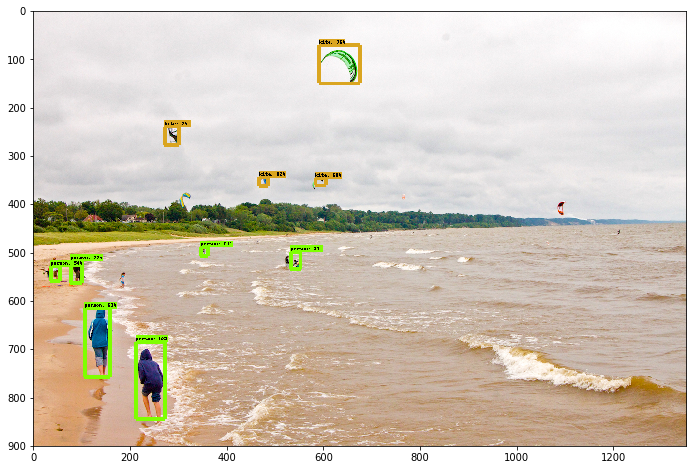

In [58]:
for image_path in TEST_IMAGE_PATHS:
  print(image_path)
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)